In [786]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import random

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

1. Batting: `batting_data.csv`
2. Bowling: `bowling_data.csv`
3. Player Name and ID Map: `player_team_name_id.csv`

In [787]:
batting_df = pd.read_csv("final_data/batting_data.csv")
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [788]:
bowling_df = pd.read_csv("final_data/bowling_data.csv")
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [789]:
player_data_df = pd.read_csv("final_data/player_team_name_id.csv")
player_data_df

,team_name,player_name,player_id
0,Afghanistan,Hashmatullah Shahidi,440970
1,Afghanistan,Rahmanullah Gurbaz,974087
2,Afghanistan,Ibrahim Zadran,921509
3,Afghanistan,Reyaz Hassan,1061090
4,Afghanistan,Rahmat Shah Zurmati,533956
...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427
146,Sri Lanka,Kasun Rajitha,499594
147,Sri Lanka,Matheesha Pathirana,1194795
148,Sri Lanka,Lahiru Kumara,784375


In [790]:
# # Collect Team Names

# team_names = player_data_df['team_name'].unique().tolist()
# team_names += bowling_df['opposition'].unique().tolist()
# team_names += batting_df['Opposition'].unique().tolist()
# team_names = list(set(team_names))
# team_names

# # Encode Team Names

# te = LabelEncoder()
# te.fit(team_names)

# batting_df['Opposition'] = te.transform(batting_df['Opposition'])
# bowling_df['opposition'] = te.transform(bowling_df['opposition'])
# player_data_df['team_name'] = te.transform(player_data_df['team_name'])

## Data Preprocessing

### Batting Data

In [791]:
batting_df = batting_df.merge(player_data_df, on="player_id", how="left")
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


In [792]:
batting_df["player_id"].value_counts()
# Valid

253802     286
56029      261
34102      256
56143      244
56025      225
          ... 
721041       4
819507       3
1139520      2
35281        2
379887       2
Name: player_id, Length: 150, dtype: int64

#### Removing unwanted columns

In [793]:
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


In [794]:
batting_df.drop(columns=["Mins", "odi_number"], inplace=True)

#### Runs

In [795]:
batting_df["Runs"].unique()

array(['0', '13*', '38*', '3', '15', '11', '31', '32', '72', '14', '21',
       '2*', '12', '23', '54', '2', '34*', '37', '58', '97*', '71', '9',
       '52', '59*', '47', '18', '4', '59', '8', '76', '82', '10', '73',
       '28', '5', '88', '1*', '38', '57', '9*', '22', '15*', '13', '51',
       '80', '48*', '127', '103', '7', '106*', '17', '53', '68', '145',
       '6', '151', '1', '65', '19', '121*', '106', '162', '98', '41*',
       '100', '75', '87', '50', '35', 'DNB', '34', '100*', '26', '16',
       '48', '30', '36', '78', '108*', 'TDNB', '44', '114', '43', '56',
       '69', '29', '33', '113', '62', '46', '24', '61', '103*', '70',
       '94', '55', '45', '77*', '83', '12*', '25', '89*', '81*', '8*',
       '67', '63*', '17*', '42', '20', '104*', '60*', '20*', '3*', '77',
       '7*', '6*', '23*', '60', '41', '46*', '14*', '116', '40', '49',
       '27*', '18*', '92', '64', '27', '50*', '25*', '5*', '86', '19*',
       '16*', '57*', '11*', '35*', '39*', '4*', '0*', '10*', '21*'

In [796]:
# We can notice *, DNB, TDNB, absent in runs

# Replace *23 with 23
batting_df["Runs"].replace(to_replace="\*", value="", regex=True, inplace=True)
batting_df["Runs"].unique()

array(['0', '13', '38', '3', '15', '11', '31', '32', '72', '14', '21',
       '2', '12', '23', '54', '34', '37', '58', '97', '71', '9', '52',
       '59', '47', '18', '4', '8', '76', '82', '10', '73', '28', '5',
       '88', '1', '57', '22', '51', '80', '48', '127', '103', '7', '106',
       '17', '53', '68', '145', '6', '151', '65', '19', '121', '162',
       '98', '41', '100', '75', '87', '50', '35', 'DNB', '26', '16', '30',
       '36', '78', '108', 'TDNB', '44', '114', '43', '56', '69', '29',
       '33', '113', '62', '46', '24', '61', '70', '94', '55', '45', '77',
       '83', '25', '89', '81', '67', '63', '42', '20', '104', '60', '116',
       '40', '49', '27', '92', '64', '86', '39', '117', '85', '99', '128',
       '96', '101', '152', '124', '102', '79', '66', '93', '95', '146',
       '74', '163', '178', '84', '122', '109', '173', '119', '156', '130',
       '179', '107', '166', '134', '105', 'absent', '126', '176', '136',
       '90', '110', '144', '125', '111', '112', 'sub',

In [797]:
# Get Non numeric values

batting_df[~batting_df["Runs"].str.isnumeric()]["Runs"].value_counts()

DNB       1830
TDNB       144
absent       5
sub          1
Name: Runs, dtype: int64

In [798]:
# Remove rows with DNB, TDNB, absent, sub

batting_df.drop(
    batting_df[batting_df["Runs"].isin(["DNB", "TDNB", "absent", "sub"])].index,
    inplace=True,
)
batting_df

,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,13,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,38,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,3,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,15,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,1,0,200.00,11,not out,2,New Zealand,Auckland,25 Mar 2023,Sri Lanka,Dilshan Madushanka
9322,793007,1,5,0,0,20.00,11,not out,1,Netherlands,Bulawayo,30 Jun 2023,Sri Lanka,Dilshan Madushanka
9325,793007,0,0,0,0,-,11,not out,1,Netherlands,Harare,9 Jul 2023,Sri Lanka,Dilshan Madushanka
9326,793007,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka


In [799]:
batting_df[~batting_df["Runs"].str.isnumeric()]["Runs"].unique()

array([], dtype=object)

In [800]:
# Change data type of runs to int

batting_df["Runs"] = batting_df["Runs"].astype(int)
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   object
 3   4s           7351 non-null   object
 4   6s           7351 non-null   object
 5   SR           7351 non-null   object
 6   Pos          7351 non-null   object
 7   Dismissal    7351 non-null   object
 8   Inns         7351 non-null   object
 9   Opposition   7351 non-null   object
 10  Ground       7351 non-null   object
 11  Start        7351 non-null   object
 12  team_name    7351 non-null   object
 13  player_name  7351 non-null   object
dtypes: int64(2), object(12)
memory usage: 861.4+ KB


#### Data Type Conversion

In [801]:
batting_df["BF"] = batting_df["BF"].astype(int)

In [802]:
batting_df["Pos"] = batting_df["Pos"].astype(int)

In [803]:
batting_df["Dismissal"].value_counts()

caught            3730
not out           1395
bowled            1082
lbw                602
run out            375
stumped            145
retired notout      15
hit wicket           6
obstruct field       1
Name: Dismissal, dtype: int64

In [804]:
batting_df["Pos"] = batting_df["Pos"].astype(int)

In [805]:
# Replace rows with "-" in 4s and 6s with 0

batting_df["4s"].replace(to_replace="-", value=0, inplace=True)
batting_df["6s"].replace(to_replace="-", value=0, inplace=True)

In [806]:
batting_df["4s"] = batting_df["4s"].astype(int)
batting_df["6s"] = batting_df["6s"].astype(int)

In [807]:
batting_df["Ground"].value_counts()

Mirpur           467
Colombo (RPS)    321
Harare           237
Pallekele        187
The Oval         169
                ... 
Toronto            1
Jamshedpur         1
Gwalior            1
Lincoln            1
Ayr                1
Name: Ground, Length: 128, dtype: int64

In [808]:
# Collect Ground Names

ground_names = batting_df["Ground"].unique().tolist()
ground_names += bowling_df["ground"].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Dublin (Malahide)',
 'Centurion',
 'Aberdeen',
 'Kochi',
 'Wankhede',
 'Mohali',
 'Rawalpindi',
 'King City (NW)',
 'Dubai (DSC)',
 'East London',
 'Delhi',
 'Kuala Lumpur',
 'Chennai',
 'Greater Noida',
 'Dambulla',
 'Dharamsala',
 'Tarouba',
 'Belfast',
 'Khulna',
 'The Hague',
 'Nairobi (Gym)',
 'Wellington',
 'Fatullah',
 'Birmingham',
 'Raipur',
 'Albion',
 'Leeds',
 'Bogra',
 'Melbourne',
 'Mirpur',
 'Deventer',
 'Colombo (RPS)',
 'Mount Maunganui',
 'Gqeberha',
 'Colombo (SSC)',
 'Guwahati',
 'Kanpur',
 'Kimberley',
 'Bulawayo',
 'Gros Islet',
 'Gwalior',
 'Manchester',
 'Lahore',
 'Dublin',
 'Hobart',
 'Jaipur',
 'Durban',
 'Dehradun',
 'Brisbane',
 'Providence',
 "St George's",
 'Bengaluru',
 'Toronto',
 'North Sound',
 'Queenstown',
 'Harare',
 'Nagpur',
 'Rotterdam',
 'Benoni',
 'Brabourne',
 'Ayr',
 'Bridgetown',
 'Sharjah',
 'Darwin',
 'Thiruvananthapuram',
 'Chester-le-Street',
 'Multan',
 'Auckland',
 'Cairns',
 'Whangarei',
 'The Oval',
 'Townsville',
 'Pallekele',
 "

In [809]:
# ge = LabelEncoder()
# ge.fit(ground_names)
# batting_df['Ground'] = ge.transform(batting_df['Ground'])
# bowling_df['ground'] = ge.transform(bowling_df['ground'])

In [810]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   int64 
 3   4s           7351 non-null   int64 
 4   6s           7351 non-null   int64 
 5   SR           7351 non-null   object
 6   Pos          7351 non-null   int64 
 7   Dismissal    7351 non-null   object
 8   Inns         7351 non-null   object
 9   Opposition   7351 non-null   object
 10  Ground       7351 non-null   object
 11  Start        7351 non-null   object
 12  team_name    7351 non-null   object
 13  player_name  7351 non-null   object
dtypes: int64(6), object(8)
memory usage: 861.4+ KB


In [811]:
# Replace rows with "-" in SR with 0

batting_df["SR"].replace(to_replace="-", value=0, inplace=True)
batting_df["SR"] = batting_df["SR"].astype(float)

### Bowling Data

In [812]:
bowling_df = bowling_df.merge(player_data_df, on="player_id", how="left")
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


#### Removing unwanted columns

In [813]:
bowling_df.drop(columns=["odi_number"], inplace=True)
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,Sri Lanka,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,Sri Lanka,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,Sri Lanka,Dilshan Madushanka


#### Overs

In [814]:
bowling_df["overs"].unique()

array(['DNB', '2.0', '1.0', 'TDNB', '3.0', '5.0', '1.5', '5.3', '6.0',
       '8.0', '4.0', '1.1', '9.0', '10.0', '9.5', '5.1', '7.0', '8.3',
       '9.4', '6.4', '5.2', '7.1', '4.1', '3.5', '8.2', '8.5', '8.1',
       '7.3', '9.2', '4.4', '4.2', '5.4', '9.3', '8.4', '7.2', '7.5',
       '4.5', '1.4', '3.2', '6.1', '6.2', '0.1', '6.5', '2.4', '0.5',
       '5.5', 'sub', '1.3', '3.1', '9.1', '6.3', '1.2', '0.2', '2.3',
       '2.5', '7.4', '0.4', '2.2', '0.3', '3.3', '4.3'], dtype=object)

In [815]:
# We can notice DNB, TDNB, sub in overs. Drop them

bowling_df.drop(
    bowling_df[bowling_df["overs"].isin(["DNB", "TDNB", "sub"])].index, inplace=True
)
bowling_df["overs"] = bowling_df["overs"].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   object 
 4   wickets      5171 non-null   object 
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 565.6+ KB


#### Runs

In [816]:
bowling_df["runs"] = bowling_df["runs"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   object 
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 565.6+ KB


#### Wickets

In [817]:
bowling_df["wickets"] = bowling_df["wickets"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 565.6+ KB


In [818]:
bowling_df["economy"] = bowling_df["economy"].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   float64
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 565.6+ KB


#### Innings

In [819]:
bowling_df["innings"] = bowling_df["innings"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   float64
 6   position     5171 non-null   object 
 7   innings      5171 non-null   int64  
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 565.6+ KB


In [820]:
bowling_df["maidens"] = bowling_df["maidens"].astype(int)

In [821]:
bowling_df["position"] = bowling_df["position"].astype(int)

In [822]:
# Reset index
batting_df.reset_index(drop=True, inplace=True)
bowling_df.reset_index(drop=True, inplace=True)

### Label Encoding

We have already encoded the `team_name`, `ground_name` beforehand to avoid any data integrity issues.

#### Batting Data

In [823]:
dismissal_encoder = LabelEncoder()
dismissal_encoder.fit(batting_df["Dismissal"])
batting_df["Dismissal"] = dismissal_encoder.transform(batting_df["Dismissal"])
batting_df

,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,0,0,0.00,3,1,2,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,13,19,0,0,68.42,5,4,2,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,38,67,4,0,56.71,4,4,2,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,3,7,0,0,42.85,4,3,1,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,15,22,2,0,68.18,4,1,1,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,793007,4,2,1,0,200.00,11,4,2,New Zealand,Auckland,25 Mar 2023,Sri Lanka,Dilshan Madushanka
7347,793007,1,5,0,0,20.00,11,4,1,Netherlands,Bulawayo,30 Jun 2023,Sri Lanka,Dilshan Madushanka
7348,793007,0,0,0,0,0.00,11,4,1,Netherlands,Harare,9 Jul 2023,Sri Lanka,Dilshan Madushanka
7349,793007,4,2,1,0,200.00,11,4,2,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka


## Visualization

#### Bowling Data

##### Wickets

In [824]:
highest_wickets = bowling_df.groupby("player_name")["wickets"].sum().reset_index()
highest_wickets.sort_values(by="wickets", ascending=False, inplace=True)
highest_wickets

,player_name,wickets
100,Shakib Al Hasan,314
65,Mitchell Starc,227
111,Tim Southee,214
86,Ravindra Jadeja,211
113,Trent Boult,203
...,...,...
61,Max O'Dowd,0
105,Steve Smith,0
104,Shreyas Iyer,0
74,Najibullah Zadran,0


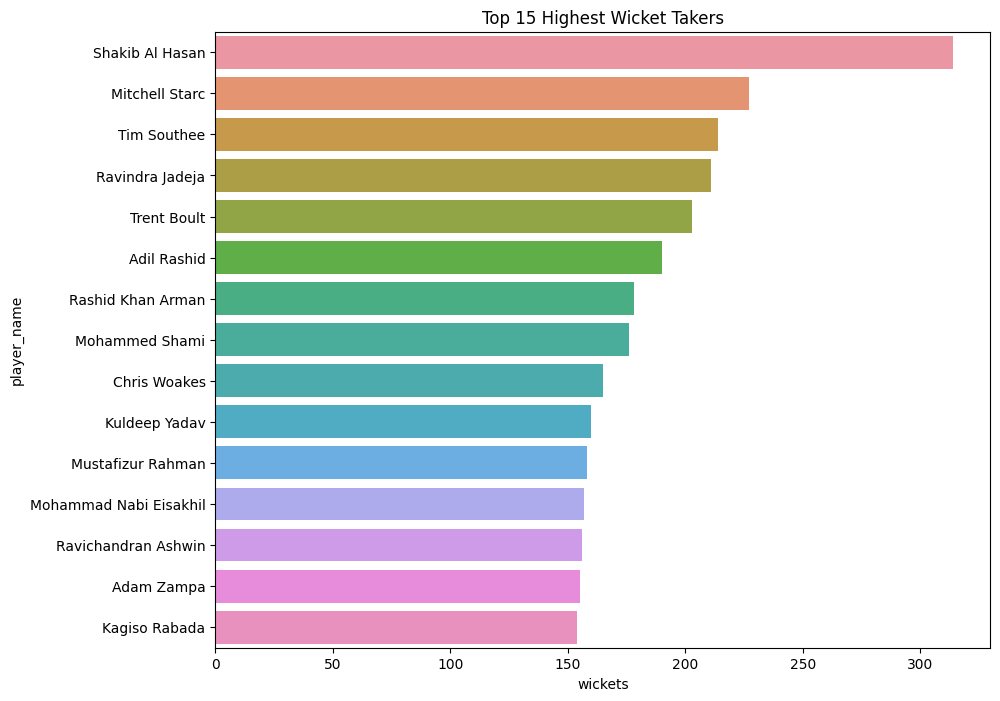

In [825]:
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="wickets", y="player_name", data=highest_wickets[:15])
plt.title("Top 15 Highest Wicket Takers")
plt.show()

In [826]:
best_figures = bowling_df.groupby("player_name")["wickets"].max().reset_index()
best_figures.sort_values(by="wickets", ascending=False, inplace=True)
best_figures

,player_name,wickets
111,Tim Southee,7
113,Trent Boult,7
83,Rashid Khan Arman,7
41,Kagiso Rabada,6
11,Chris Woakes,6
...,...,...
61,Max O'Dowd,0
105,Steve Smith,0
104,Shreyas Iyer,0
74,Najibullah Zadran,0


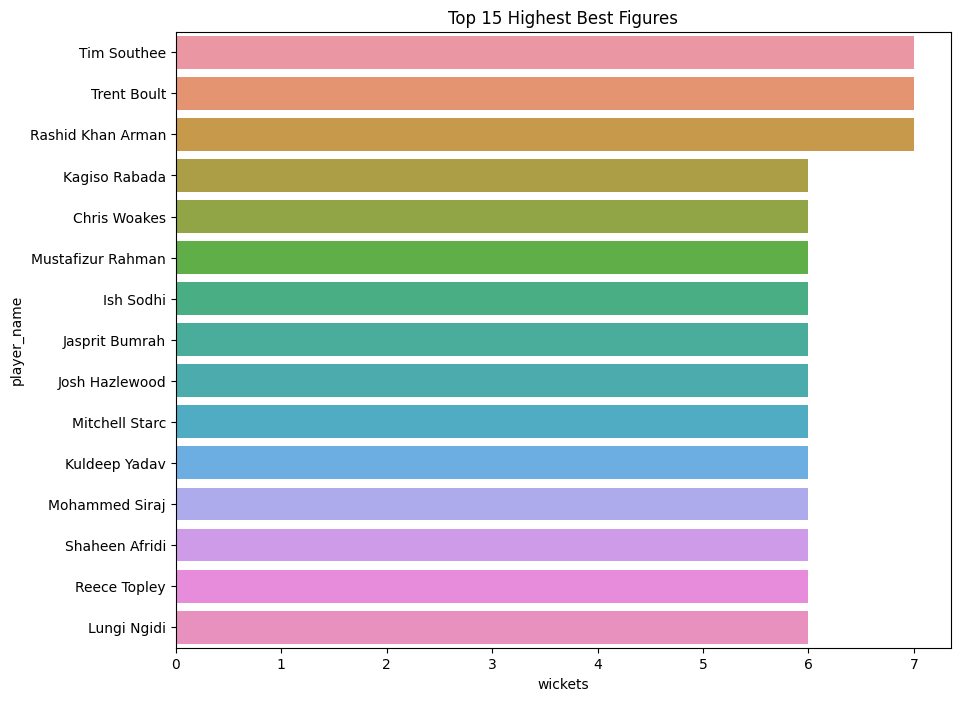

In [827]:
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="wickets", y="player_name", data=best_figures[:15])
plt.title("Top 15 Highest Best Figures")
plt.show()

In [828]:
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,team_name,player_name
0,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
1,440970,1.0,0,8,0,8.00,6,2,Zimbabwe,Harare,16 Feb 2017,Afghanistan,Hashmatullah Shahidi
2,533956,3.0,0,10,0,3.33,7,1,Scotland,Sharjah,6 Mar 2013,Afghanistan,Rahmat Shah Zurmati
3,533956,5.0,0,22,0,4.40,6,1,Scotland,Sharjah,8 Mar 2013,Afghanistan,Rahmat Shah Zurmati
4,533956,1.5,1,7,1,3.81,5,1,Kenya,Sharjah,2 Oct 2013,Afghanistan,Rahmat Shah Zurmati
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka
5167,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,Sri Lanka,Dilshan Madushanka
5168,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,Sri Lanka,Dilshan Madushanka
5169,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,Sri Lanka,Dilshan Madushanka


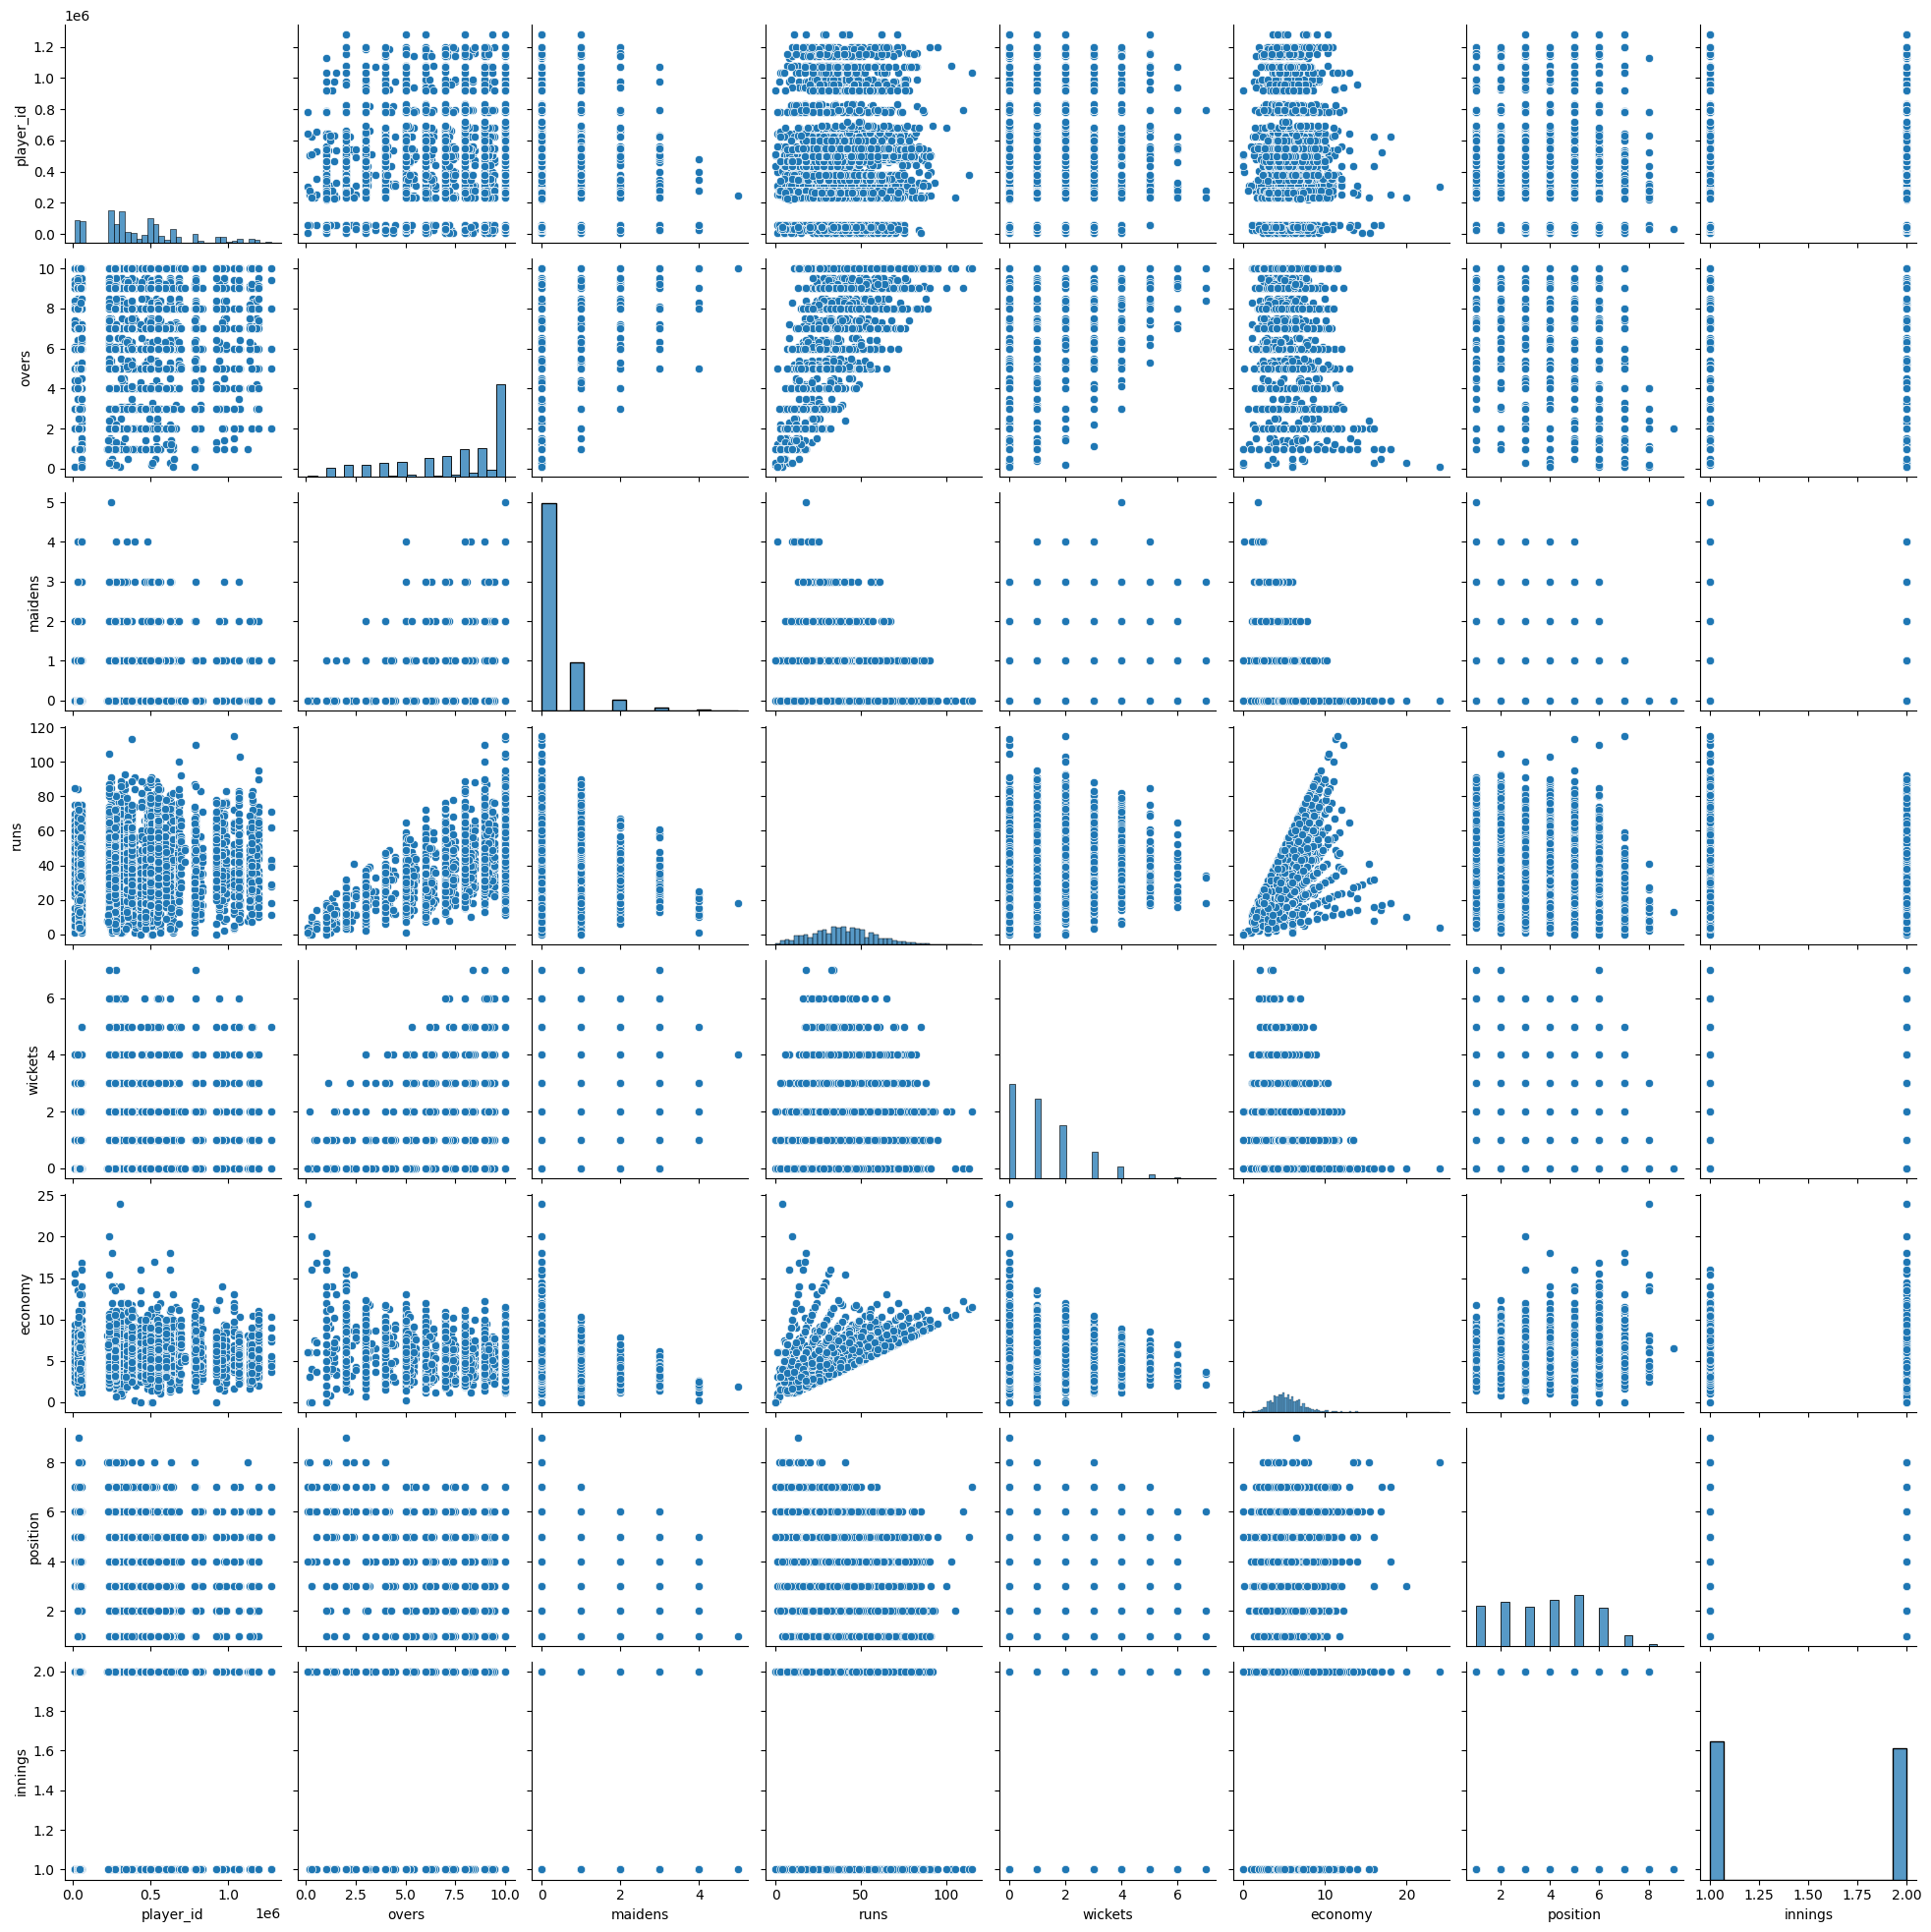

In [829]:
sns.pairplot(bowling_df)

<Axes: >

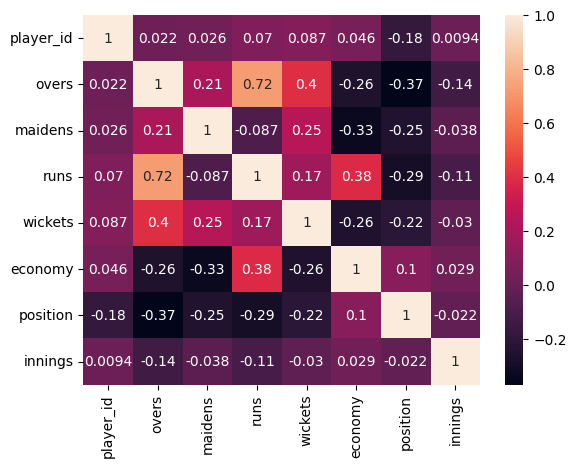

In [830]:
sns.heatmap(bowling_df.corr(), annot=True)

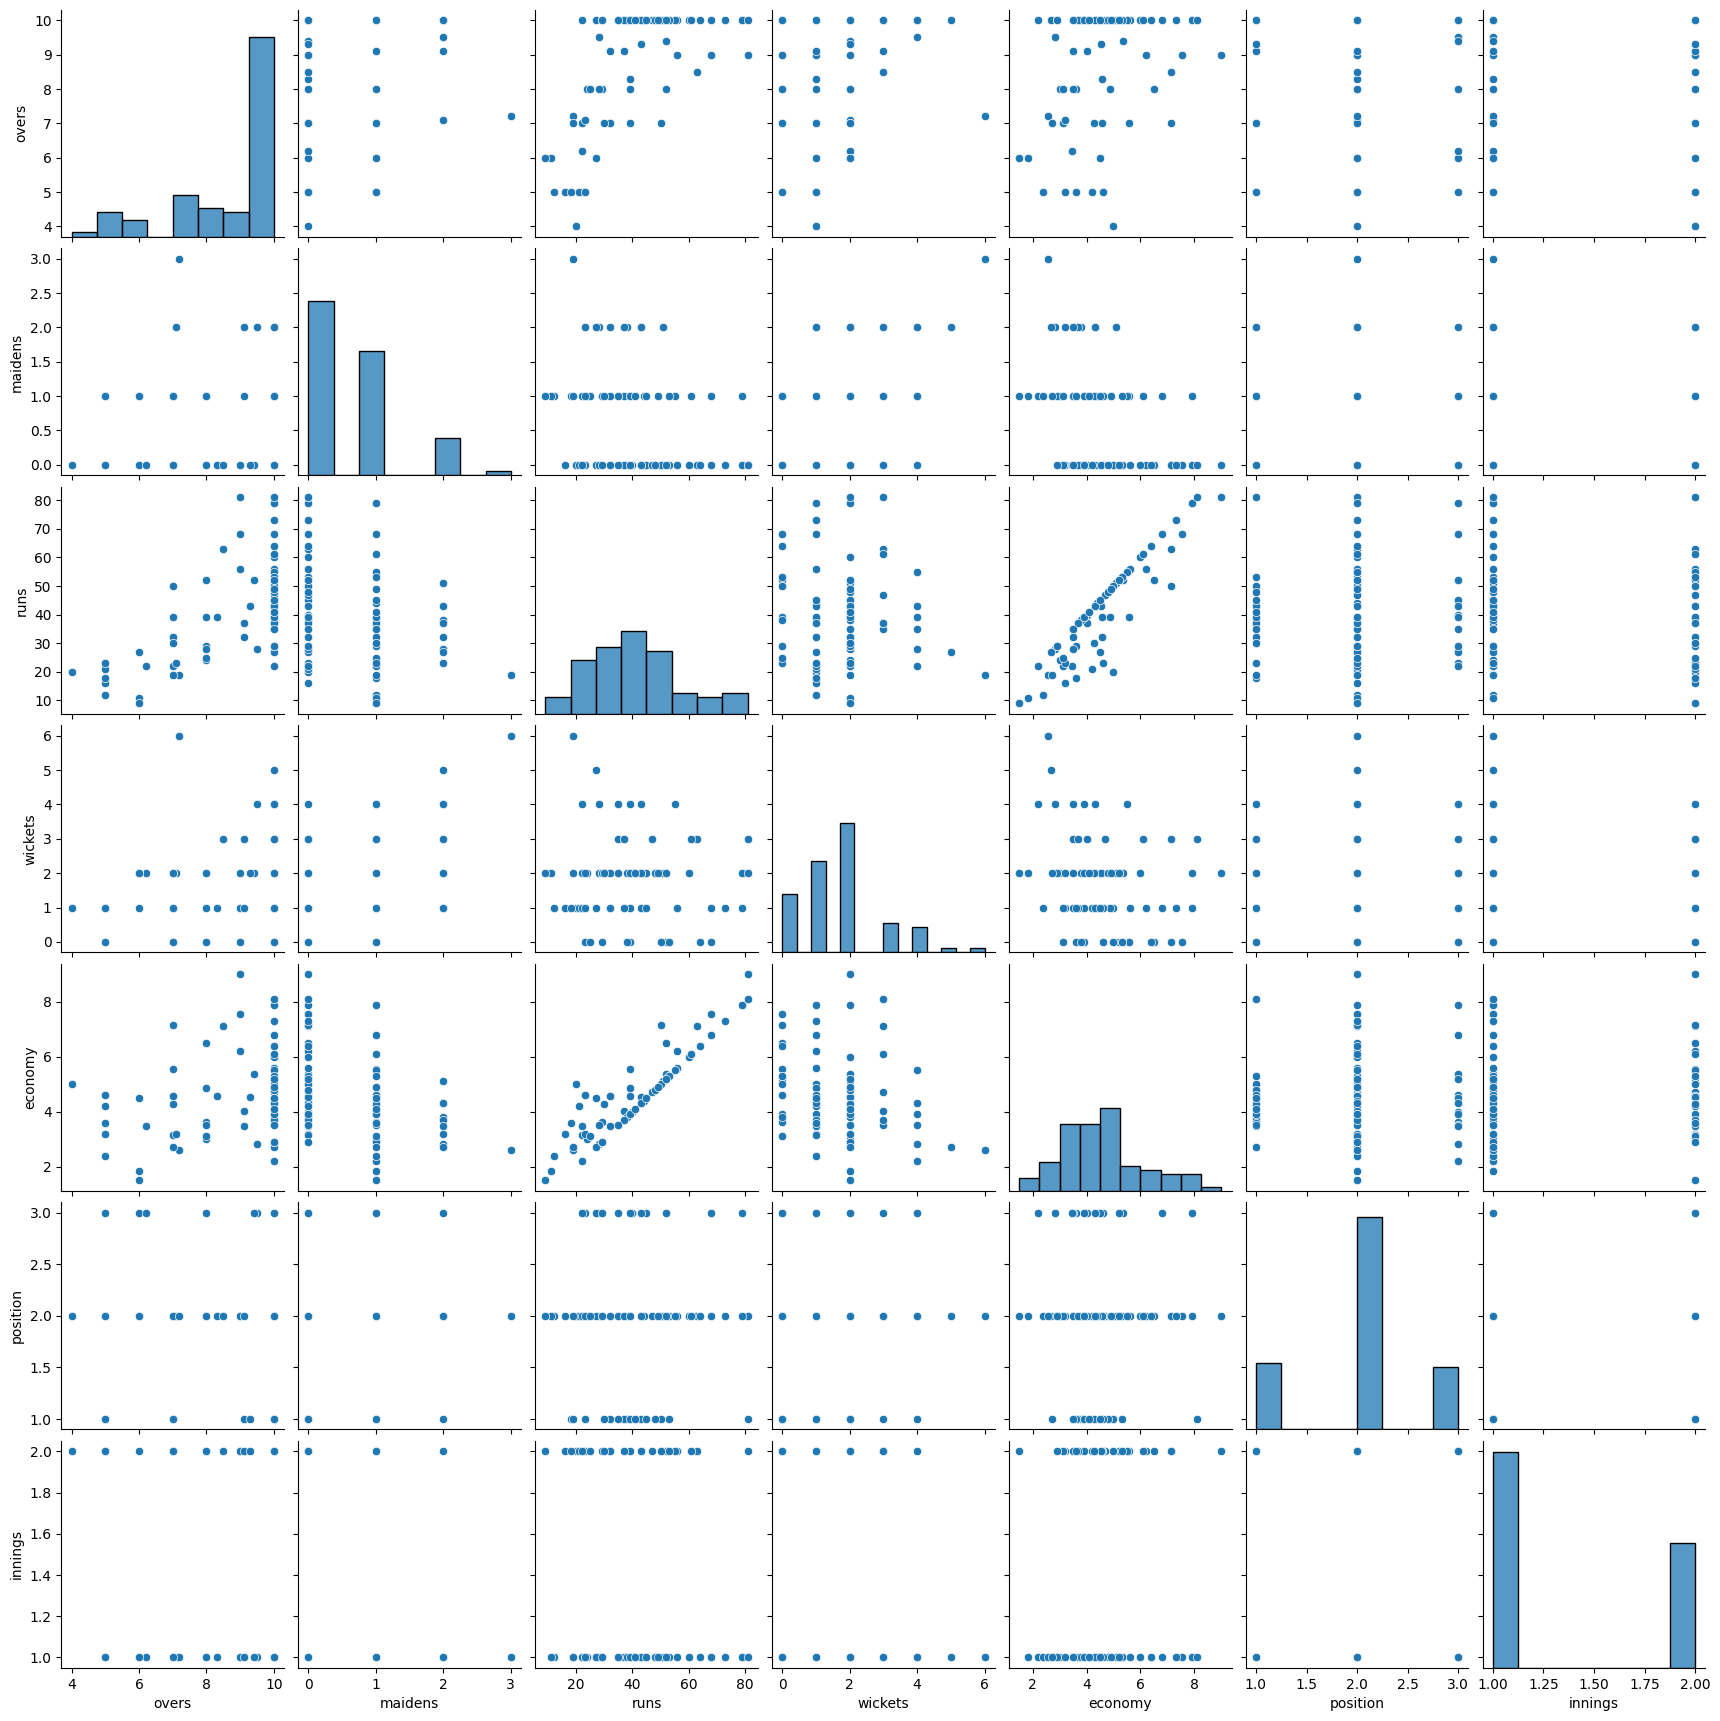

In [831]:
player_bodf = bowling_df[bowling_df["player_name"] == "Jasprit Bumrah"]
player_bodf.drop(columns=["player_name", "player_id"], inplace=True)
sns.pairplot(player_bodf)

#### Batting Data

##### Runs

In [832]:
highest_scores = batting_df.groupby(["player_name"])["Runs"].max().reset_index()
highest_scores

,player_name,Runs
0,Abdul Rahman Rahmani,4
1,Abdullah Shafique,113
2,Adam Zampa,36
3,Adil Rashid,69
4,Aiden Markram,175
...,...,...
144,Usama Mir,20
145,Vikram Singh,8
146,Virat Kohli,183
147,Wesley Barresi,137


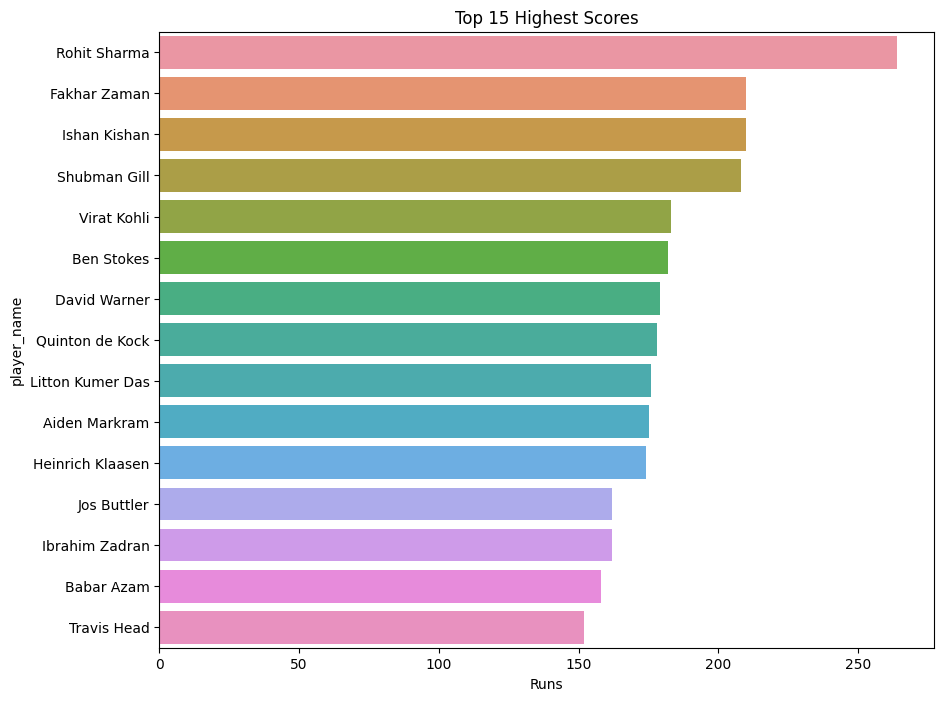

In [833]:
# Get top 15 highest scores
highest_scores.sort_values(by="Runs", ascending=False, inplace=True)
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="Runs", y="player_name", data=highest_scores[:15])
plt.title("Top 15 Highest Scores")
plt.show()

##### Feature Distribution

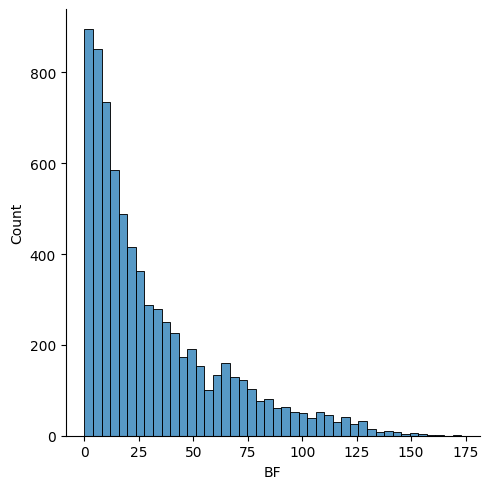

In [834]:
sns.displot(batting_df["BF"])

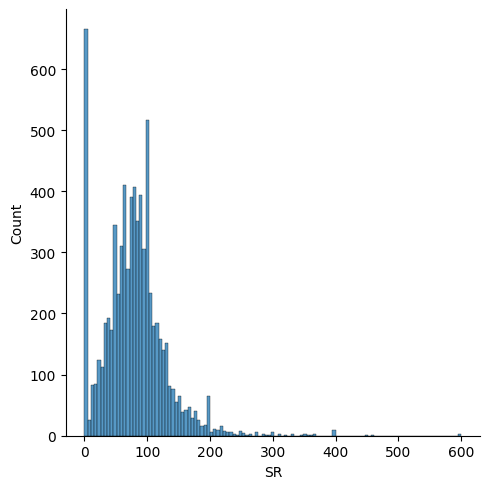

In [835]:
sns.displot(batting_df["SR"])

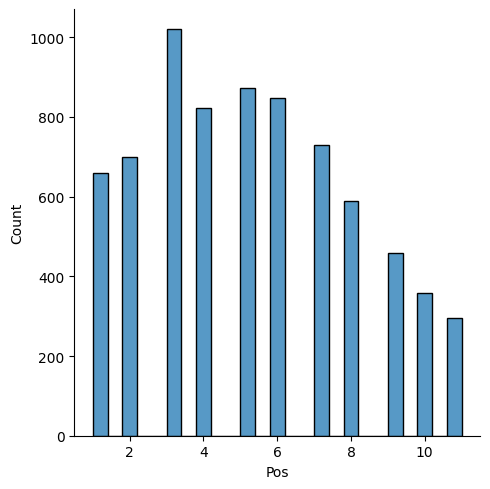

In [836]:
sns.displot(batting_df["Pos"])

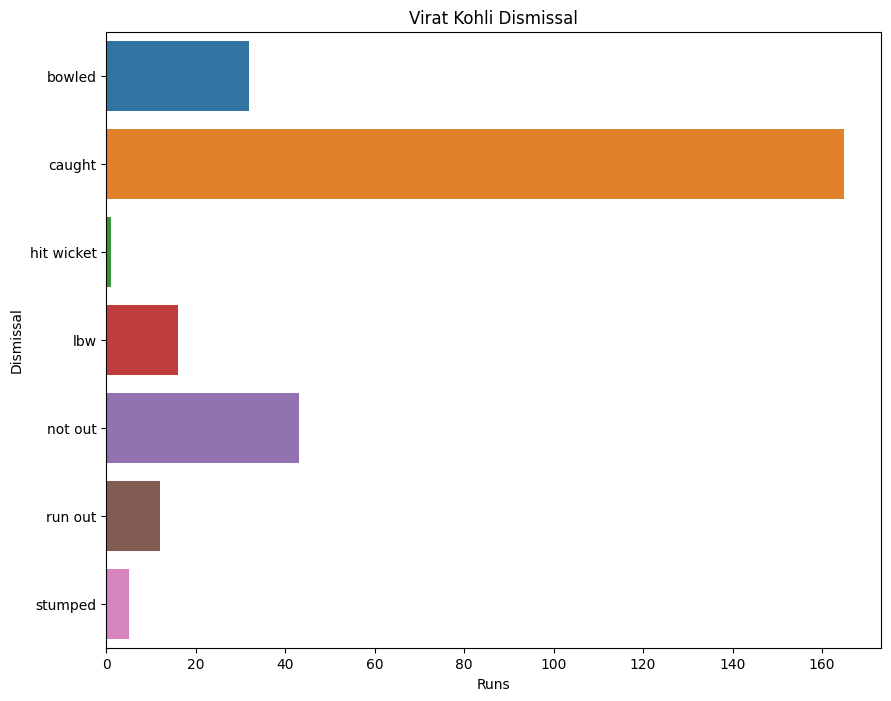

In [837]:
dismissal_df = (
    batting_df.groupby(["player_name", "Dismissal"])["Runs"].count().reset_index()
)
dismissal_df["Dismissal"] = dismissal_encoder.inverse_transform(
    dismissal_df["Dismissal"]
)

# Just Virat Kohli Dismissal
plt.figure(figsize=(10, 8))
sns.barplot(
    x="Runs",
    y="Dismissal",
    data=dismissal_df[dismissal_df["player_name"] == "Virat Kohli"],
)
plt.title("Virat Kohli Dismissal")
plt.show()

## Feature Selection

### Batting Data

In [838]:
batting_df.columns

Index(['player_id', 'Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start', 'team_name', 'player_name'],
      dtype='object')

<Axes: >

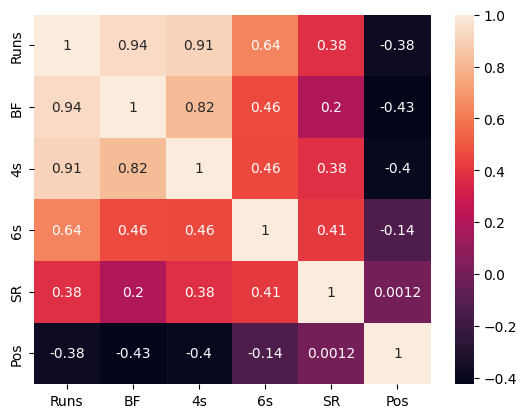

In [839]:
heatmap_df = batting_df[["Runs", "BF", "4s", "6s", "SR", "Pos", "Ground", "Opposition"]]
sns.heatmap(heatmap_df.corr(), annot=True)

Runs and Balls Faced are highly correlated. So, it has a greater impact on the model. Let's plot and see.

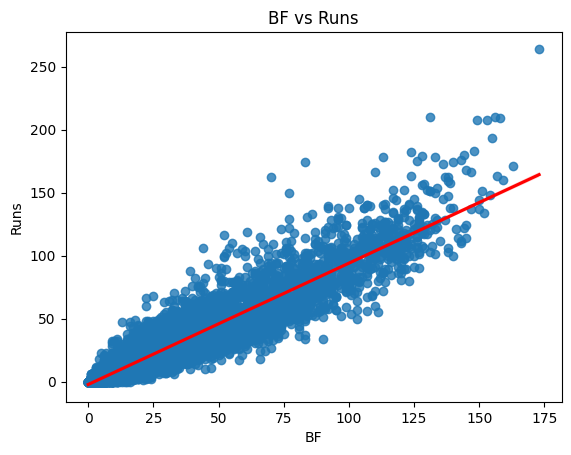

In [840]:
# Red regression line
sns.regplot(x="BF", y="Runs", data=batting_df, line_kws={"color": "red"})
plt.title("BF vs Runs")
plt.show()

#### One Hot Encoding

In [841]:
# Encoding team names with dummies. One hot encoding

dummy_encoded_bdf = pd.get_dummies(
    batting_df[["player_name", "Opposition", "Ground"]], prefix=""
).astype(int)
dummy_encoded_bdf.rename(columns=lambda x: re.sub(r"_v", "", x), inplace=True)
dummy_encoded_bdf.rename(columns=lambda y: re.sub(r"_", "", y), inplace=True)
dummy_encoded_bdf.astype(float)

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,The Oval,Thiruvananthapuram,Toronto,Townsville,Utrecht,Vadodara,Visakhapatnam,Wankhede,Wellington,Whangarei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [842]:
bdf_copy = batting_df.copy()

In [843]:
merged_bdf = pd.concat([dummy_encoded_bdf, bdf_copy], axis="columns")
merged_bdf.describe()

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,Wellington,Whangarei,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,...,7351.000000,7351.000000,7.351000e+03,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,0.000408,0.001088,0.006122,0.008706,0.007754,0.008978,0.006666,0.003129,0.001632,0.014964,...,0.013468,0.000544,3.967865e+05,28.243096,31.678139,2.552442,0.541559,79.327902,5.253979,2.041627
std,0.020199,0.032973,0.078006,0.092907,0.087721,0.094334,0.081377,0.055852,0.040373,0.121417,...,0.115274,0.023322,2.705328e+05,32.010620,31.118406,3.256548,1.200626,50.557999,2.790967,1.988787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.656000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.472350e+05,5.000000,8.000000,0.000000,0.000000,50.000000,3.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.264340e+05,16.000000,21.000000,1.000000,0.000000,77.770000,5.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.339560e+05,41.000000,47.000000,4.000000,1.000000,100.000000,7.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.278252e+06,264.000000,173.000000,33.000000,16.000000,600.000000,11.000000,8.000000


In [844]:
final_df = merged_bdf.drop(["player_name", "Opposition"], axis="columns")
final_df

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,BF,4s,6s,SR,Pos,Dismissal,Inns,Ground,Start,team_name
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0.00,3,1,2,Sharjah,2 Oct 2013,Afghanistan
1,0,0,0,0,0,0,0,0,0,0,...,19,0,0,68.42,5,4,2,Sharjah,4 Oct 2013,Afghanistan
2,0,0,0,0,0,0,0,0,0,0,...,67,4,0,56.71,4,4,2,Kuala Lumpur,1 May 2014,Afghanistan
3,0,0,0,0,0,0,0,0,0,0,...,7,0,0,42.85,4,3,1,Kuala Lumpur,2 May 2014,Afghanistan
4,0,0,0,0,0,0,0,0,0,0,...,22,2,0,68.18,4,1,1,Bulawayo,18 Jul 2014,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0,0,0,0,0,0,0,0,0,0,...,2,1,0,200.00,11,4,2,Auckland,25 Mar 2023,Sri Lanka
7347,0,0,0,0,0,0,0,0,0,0,...,5,0,0,20.00,11,4,1,Bulawayo,30 Jun 2023,Sri Lanka
7348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00,11,4,1,Harare,9 Jul 2023,Sri Lanka
7349,0,0,0,0,0,0,0,0,0,0,...,2,1,0,200.00,11,4,2,Delhi,7 Oct 2023,Sri Lanka


### Bowling Data

In [845]:
bowling_df.drop(columns=["player_id", "team_name", 'start_date', 'position'], inplace=True)
bowling_df

,overs,maidens,runs,wickets,economy,innings,opposition,ground,player_name
0,2.0,0,17,0,8.50,2,U.A.E.,Kuala Lumpur,Hashmatullah Shahidi
1,1.0,0,8,0,8.00,2,Zimbabwe,Harare,Hashmatullah Shahidi
2,3.0,0,10,0,3.33,1,Scotland,Sharjah,Rahmat Shah Zurmati
3,5.0,0,22,0,4.40,1,Scotland,Sharjah,Rahmat Shah Zurmati
4,1.5,1,7,1,3.81,1,Kenya,Sharjah,Rahmat Shah Zurmati
...,...,...,...,...,...,...,...,...,...
5166,10.0,0,86,2,8.60,1,South Africa,Delhi,Dilshan Madushanka
5167,9.2,0,60,2,6.42,2,Pakistan,Hyderabad,Dilshan Madushanka
5168,9.0,2,38,3,4.22,2,Australia,Lucknow,Dilshan Madushanka
5169,9.4,1,49,4,5.06,1,Netherlands,Lucknow,Dilshan Madushanka


In [846]:
bodf_copy = bowling_df.copy()
bodf_copy

,overs,maidens,runs,wickets,economy,innings,opposition,ground,player_name
0,2.0,0,17,0,8.50,2,U.A.E.,Kuala Lumpur,Hashmatullah Shahidi
1,1.0,0,8,0,8.00,2,Zimbabwe,Harare,Hashmatullah Shahidi
2,3.0,0,10,0,3.33,1,Scotland,Sharjah,Rahmat Shah Zurmati
3,5.0,0,22,0,4.40,1,Scotland,Sharjah,Rahmat Shah Zurmati
4,1.5,1,7,1,3.81,1,Kenya,Sharjah,Rahmat Shah Zurmati
...,...,...,...,...,...,...,...,...,...
5166,10.0,0,86,2,8.60,1,South Africa,Delhi,Dilshan Madushanka
5167,9.2,0,60,2,6.42,2,Pakistan,Hyderabad,Dilshan Madushanka
5168,9.0,2,38,3,4.22,2,Australia,Lucknow,Dilshan Madushanka
5169,9.4,1,49,4,5.06,1,Netherlands,Lucknow,Dilshan Madushanka


#### One Hot Encoding

In [847]:
# Encoding team names with dummies. One hot encoding

dummy_encoded_bodf = pd.get_dummies(
    bowling_df[["player_name", "opposition", "ground"]], prefix=""
).astype(int)
dummy_encoded_bodf.rename(columns=lambda x: re.sub(r"_v", "", x), inplace=True)
dummy_encoded_bodf.rename(columns=lambda y: re.sub(r"_", "", y), inplace=True)
dummy_encoded_bodf.astype(float)

,Abdul Rahman Rahmani,Adam Zampa,Adil Rashid,Aiden Markram,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Bas de Leede,Ben Stokes,Cameron Green,...,The Oval,Thiruvananthapuram,Toronto,Townsville,Utrecht,Vadodara,Visakhapatnam,Wankhede,Wellington,Whangarei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [848]:
merged_bodf = pd.concat([dummy_encoded_bodf, bodf_copy], axis="columns")
merged_bodf.describe()

,Abdul Rahman Rahmani,Adam Zampa,Adil Rashid,Aiden Markram,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Bas de Leede,Ben Stokes,Cameron Green,...,Visakhapatnam,Wankhede,Wellington,Whangarei,overs,maidens,runs,wickets,economy,innings
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,...,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.000580,0.017405,0.023980,0.004641,0.013730,0.005802,0.003481,0.005415,0.017018,0.004061,...,0.006188,0.011410,0.015278,0.000967,7.442990,0.293560,39.150261,1.247341,5.426132,1.486946
std,0.024082,0.130787,0.153001,0.067975,0.116381,0.075954,0.058903,0.073393,0.129351,0.063603,...,0.078430,0.106216,0.122666,0.031083,2.754851,0.609146,17.692649,1.259137,1.910527,0.499878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,27.000000,0.000000,4.140000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,39.000000,1.000000,5.200000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,51.000000,2.000000,6.490000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,10.000000,5.000000,115.000000,7.000000,24.000000,2.000000


In [849]:
final_bodf = merged_bodf.drop(["player_name", "opposition", "ground"], axis="columns")
final_bodf

,Abdul Rahman Rahmani,Adam Zampa,Adil Rashid,Aiden Markram,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Bas de Leede,Ben Stokes,Cameron Green,...,Visakhapatnam,Wankhede,Wellington,Whangarei,overs,maidens,runs,wickets,economy,innings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,0,17,0,8.50,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.0,0,8,0,8.00,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,0,10,0,3.33,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.0,0,22,0,4.40,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.5,1,7,1,3.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10.0,0,86,2,8.60,1
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.2,0,60,2,6.42,2
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.0,2,38,3,4.22,2
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.4,1,49,4,5.06,1


## Model Building

### Bowling Data

In [850]:
#	overs	maidens	runs	wickets	economy	position	innings	opposition	ground	player_name

player_bodf = final_bodf[[ "Jasprit Bumrah", "Australia", "Chennai", "overs", "maidens", "runs", "wickets", "economy"]]
player_bodf

,Jasprit Bumrah,Australia,Chennai,overs,maidens,runs,wickets,economy
0,0,0,0,2.0,0,17,0,8.50
1,0,0,0,1.0,0,8,0,8.00
2,0,0,0,3.0,0,10,0,3.33
3,0,0,0,5.0,0,22,0,4.40
4,0,0,0,1.5,1,7,1,3.81
...,...,...,...,...,...,...,...,...
5166,0,0,0,10.0,0,86,2,8.60
5167,0,0,0,9.2,0,60,2,6.42
5168,0,1,0,9.0,2,38,3,4.22
5169,0,0,0,9.4,1,49,4,5.06


In [851]:
X = player_bodf.drop(["economy"], axis="columns")
y = player_bodf["economy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#### Linear Regression

In [852]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7598369779322087

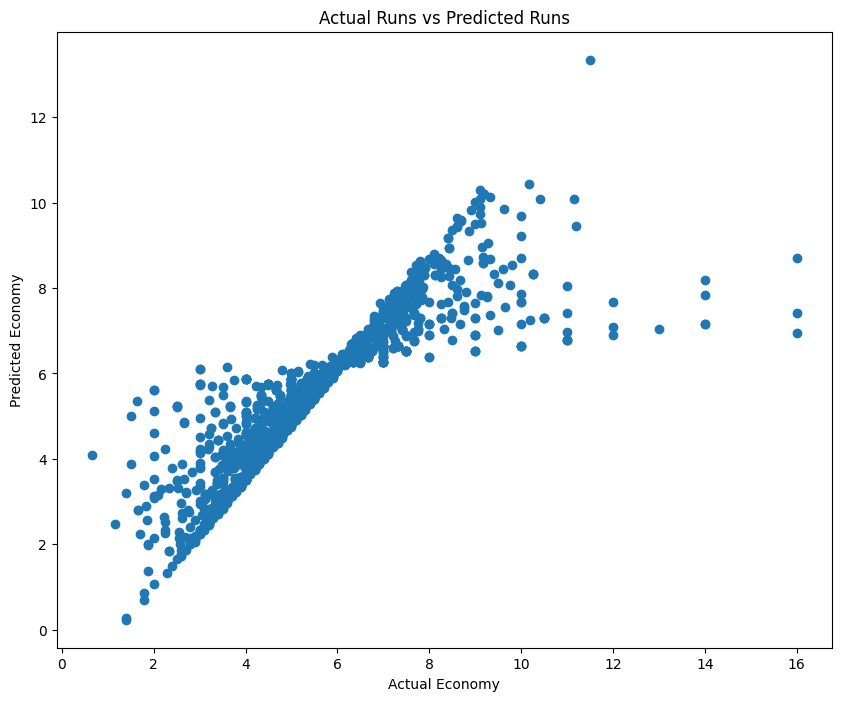

In [853]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Decision Tree Regression

In [854]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9845039835665358

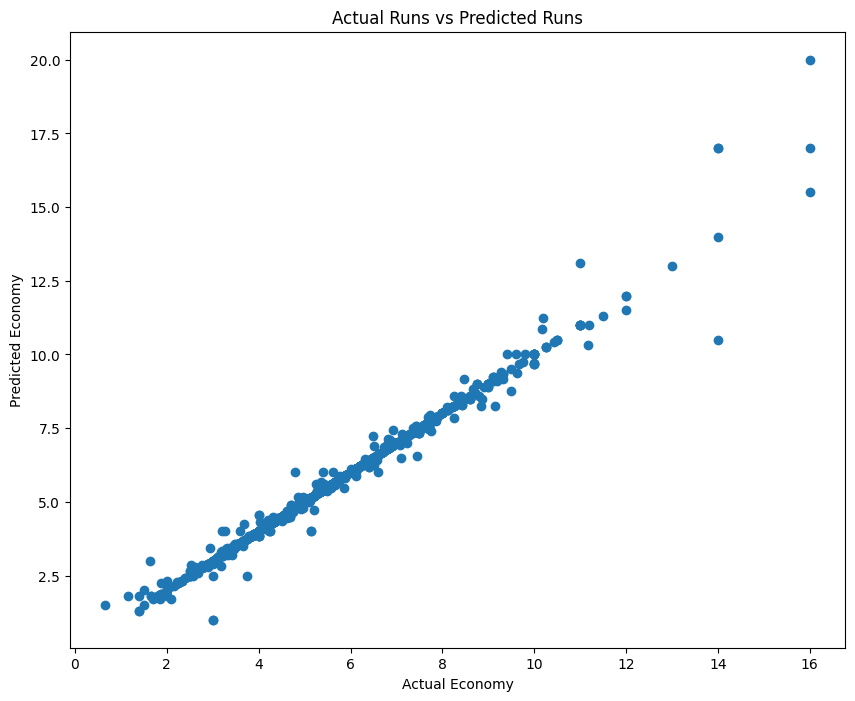

In [855]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Random Forest Regression

In [856]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9852467549164847

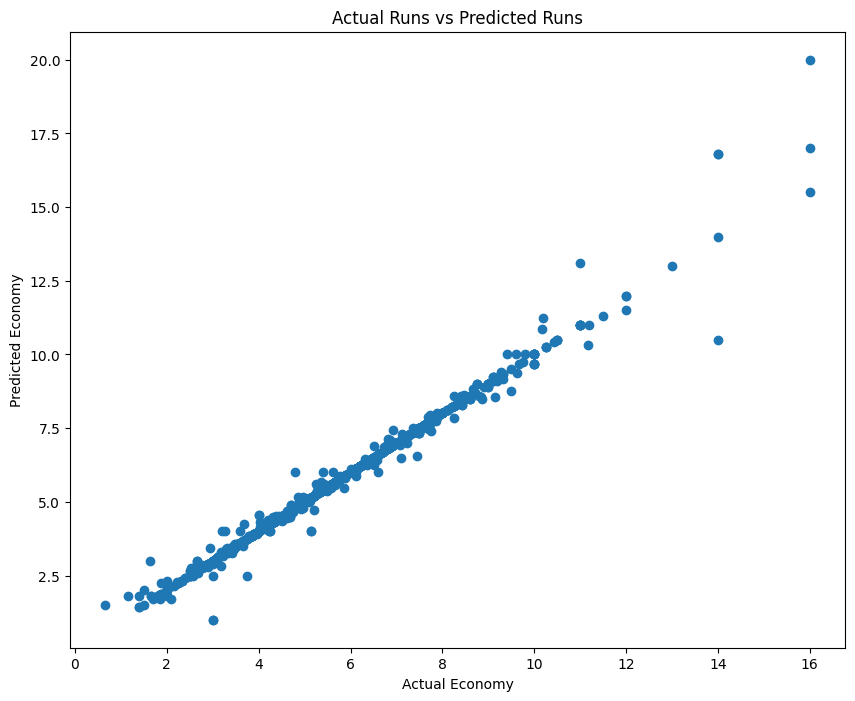

In [857]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Generalising

In [858]:
def build_bowl_model(player_name, opposition_team, ground_name):
    player_bodf = final_bodf[[player_name, opposition_team, ground_name, "overs", "maidens", "runs", "wickets", "economy"]]

    X = player_bodf.drop(["economy"], axis="columns")
    y = player_bodf["economy"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)

    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # gb_model = GradientBoostingRegressor()
    # gb_model.fit(X_train, y_train)

    return linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_bodf


In [859]:
linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df = build_bowl_model("Ravindra Jadeja", "Australia", "Bengaluru")
# Accuracies

print("Linear Regression Accuracy: ", linear_model.score(X_test, y_test))
print("Decision Tree Accuracy: ", dt_model.score(X_test, y_test))
print("Random Forest Accuracy: ", rf_model.score(X_test, y_test))
# print("Gradient Boosting Accuracy: ", gb_model.score(X_test, y_test))



Linear Regression Accuracy:  0.7570761424858773
Decision Tree Accuracy:  0.9884433183504969
Random Forest Accuracy:  0.9926896384405928


In [860]:
# Performance Metrics

y_pred = linear_model.predict(X_test)
print("Linear Regression Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()
y_pred = dt_model.predict(X_test)
print("Decision Tree Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()
y_pred = rf_model.predict(X_test)
print("Random Forest Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Linear Regression Metrics
Mean Squared Error:  0.814711858403642
Mean Absolute Error:  0.47725529516402415
R2 Score:  0.7570761424858773

Decision Tree Metrics
Mean Squared Error:  0.038758505154639175
Mean Absolute Error:  0.038350515463917864
R2 Score:  0.9884433183504969

Random Forest Metrics
Mean Squared Error:  0.02451730477448455
Mean Absolute Error:  0.02775393041237339
R2 Score:  0.9926896384405928


In [882]:
def predict_economy(player_name, opposition_name, ground_name):
    try:
        linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_bodf = build_bowl_model(player_name, opposition_name, ground_name)

        accuracy_list = [linear_model.score(X_test, y_test), dt_model.score(X_test, y_test), rf_model.score(X_test, y_test)]

        output_string = ""

        output_string += "Linear Regression Accuracy: " + str(linear_model.score(X_test, y_test)) + "\n"
        output_string += "Decision Tree Accuracy: " + str(dt_model.score(X_test, y_test)) + "\n"
        output_string += "Random Forest Accuracy: " + str(rf_model.score(X_test, y_test)) + "\n"

        # print("Linear Regression Accuracy: ", linear_model.score(X_test, y_test))
        # print("Decision Tree Accuracy: ", dt_model.score(X_test, y_test))
        # print("Random Forest Accuracy: ", rf_model.score(X_test, y_test))

        max_index = 0
        for i in range(len(accuracy_list)):
            if accuracy_list[i] > accuracy_list[max_index]:
                max_index = i

        career_overs_avg = max(player_bodf["overs"].mean() + random.randint(-2, 4), player_bodf["overs"].mean())
        career_maidens_avg = max(player_bodf["maidens"].mean() + random.randint(-1, 2), player_bodf["maidens"].mean())
        career_runs_avg = max(player_bodf["runs"].mean() + random.randint(-10, 20), player_bodf["runs"].mean())
        career_wickets_avg = max(player_bodf["wickets"].mean() + random.randint(-1, 2), player_bodf["wickets"].mean())

        # [player_name, opposition_team, ground_name, "overs", "maidens", "runs", "wickets", "economy"]

        if max_index == 0:
            # Linear Regression
            output_string += "Model Chosen: Linear Regression" + "\n"
            # print("Model Chosen: Linear Regression")
            economy = linear_model.predict([[1, 1, 1, career_overs_avg, career_maidens_avg, career_runs_avg, career_wickets_avg]])
            return float(economy[0]), output_string
        elif max_index == 1:
            # Decision Tree
            output_string += "Model Chosen: Decision Tree" + "\n"
            # print("Model Chosen: Decision Tree")
            economy = linear_model.predict([[1, 1, 1, career_overs_avg, career_maidens_avg, career_runs_avg, career_wickets_avg]])
            return float(economy[0]), output_string
        else:
            # Random Forest
            output_string += "Model Chosen: Random Forest" + "\n"
            # print("Model Chosen: Random Forest")
            economy = linear_model.predict([[1, 1, 1, career_overs_avg, career_maidens_avg, career_runs_avg, career_wickets_avg]])
            return float(economy[0]), output_string
        
        return -1
    
    except Exception as e:
        # Stack trace print
        print(e.with_traceback())
        return -1


### Batting Data

In [883]:
player_df = final_df[["Virat Kohli", "Australia", "Runs", "BF", "Bengaluru", "SR"]]
player_df

,Virat Kohli,Australia,Runs,BF,Bengaluru,SR
0,0,0,0,3,0,0.00
1,0,0,13,19,0,68.42
2,0,0,38,67,0,56.71
3,0,0,3,7,0,42.85
4,0,0,15,22,0,68.18
...,...,...,...,...,...,...
7346,0,0,4,2,0,200.00
7347,0,0,1,5,0,20.00
7348,0,0,0,0,0,0.00
7349,0,0,4,2,0,200.00


In [884]:
X = player_df.drop(["Runs"], axis="columns")
y = player_df["Runs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#### Linear Regression

In [865]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.919021417310488

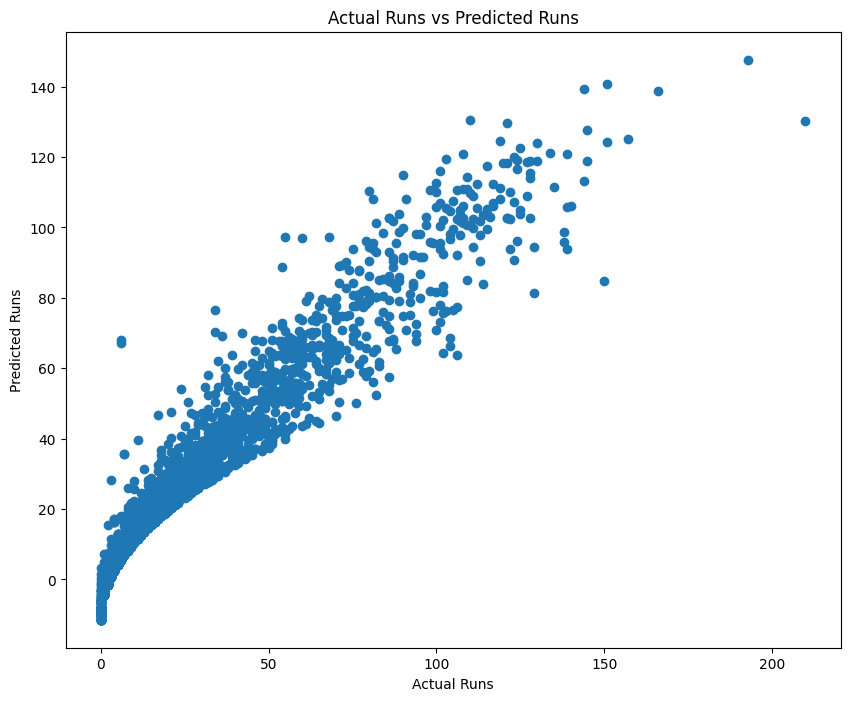

In [866]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Decision Tree Regression

In [867]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9973691655208332

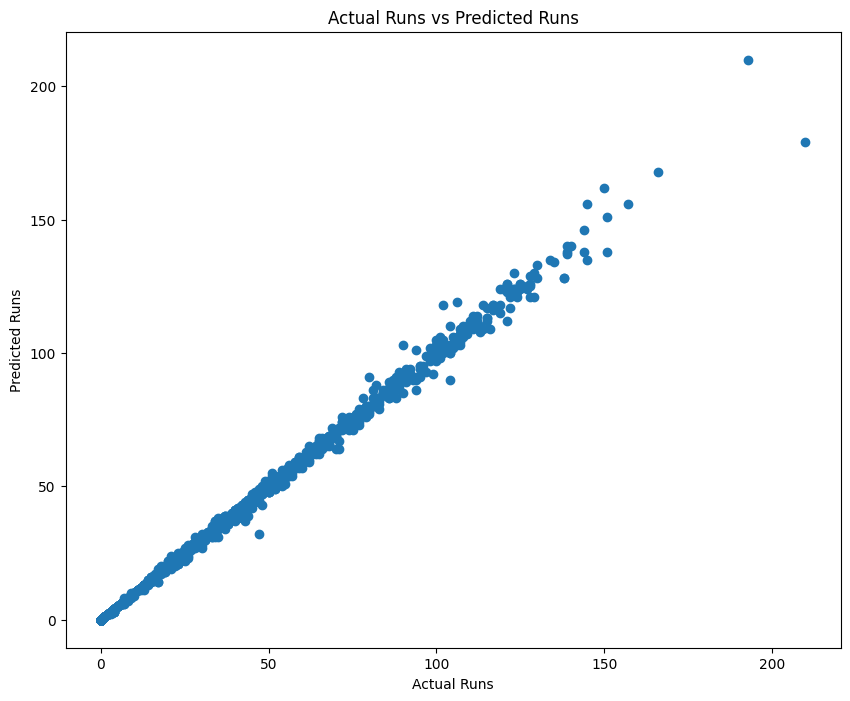

In [868]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Random Forest Regression

In [869]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9990449813681267

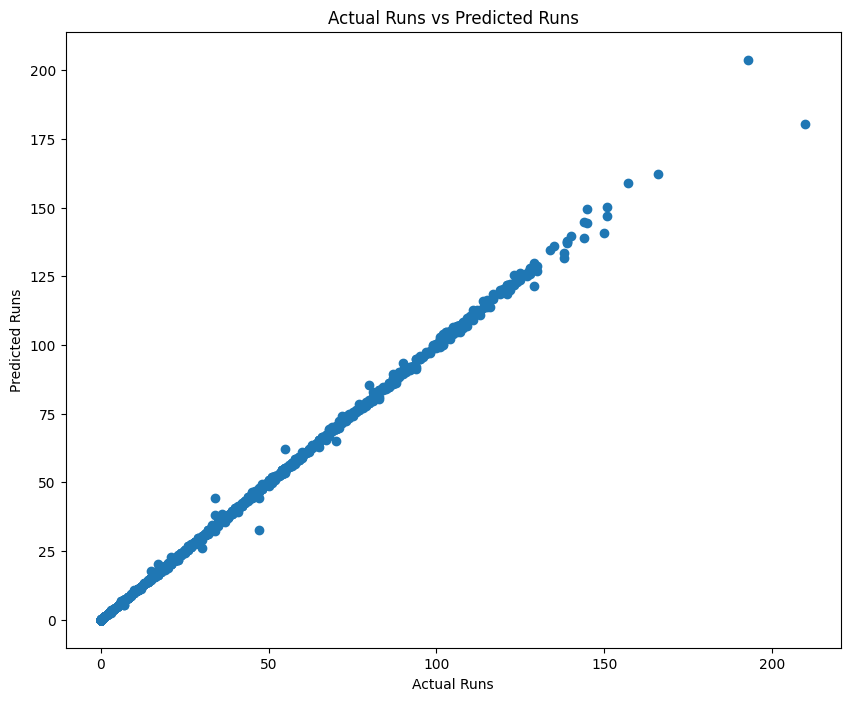

In [870]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Generalizing

In [871]:
def build_model(player_name, opposition_team, ground_name):
    player_df = final_df[
        [player_name, opposition_team, "Runs", "BF", "Inns", ground_name, "SR"]
    ]

    X = player_df.drop(["Runs"], axis="columns")
    y = player_df["Runs"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)

    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # gb_model = GradientBoostingRegressor()
    # gb_model.fit(X_train, y_train)

    return linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df


In [872]:
linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df = build_model("Virat Kohli", "Australia", "Bengaluru")

In [873]:
# Accuracies

print("Linear Regression Accuracy: ", linear_model.score(X_test, y_test))
print("Decision Tree Accuracy: ", dt_model.score(X_test, y_test))
print("Random Forest Accuracy: ", rf_model.score(X_test, y_test))
# print("Gradient Boosting Accuracy: ", gb_model.score(X_test, y_test))

Linear Regression Accuracy:  0.9084039153238603
Decision Tree Accuracy:  0.9940440657552614
Random Forest Accuracy:  0.9961575577127975


In [874]:
# Performance Metrics

y_pred = linear_model.predict(X_test)
print("Linear Regression Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()
y_pred = dt_model.predict(X_test)
print("Decision Tree Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()
y_pred = rf_model.predict(X_test)
print("Random Forest Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Linear Regression Metrics
Mean Squared Error:  93.99571200745756
Mean Absolute Error:  6.102702519840002
R2 Score:  0.9084039153238603

Decision Tree Metrics
Mean Squared Error:  6.1119673617407075
Mean Absolute Error:  0.6686310063463282
R2 Score:  0.9940440657552614

Random Forest Metrics
Mean Squared Error:  3.9431063009972784
Mean Absolute Error:  0.3569038984587488
R2 Score:  0.9961575577127975


In [885]:
def predict_runs(player_name, opposition_name, ground_name, career_sr):
    try:
        linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df = build_model(player_name, opposition_name, ground_name)

        accuracy_list = [linear_model.score(X_test, y_test), dt_model.score(X_test, y_test), rf_model.score(X_test, y_test)]

        output_string = ""

        output_string += "Linear Regression Accuracy: " + str(linear_model.score(X_test, y_test)) + "\n"
        output_string += "Decision Tree Accuracy: " + str(dt_model.score(X_test, y_test)) + "\n"
        output_string += "Random Forest Accuracy: " + str(rf_model.score(X_test, y_test)) + "\n"

        # print("Linear Regression Accuracy: ", linear_model.score(X_test, y_test))
        # print("Decision Tree Accuracy: ", dt_model.score(X_test, y_test))
        # print("Random Forest Accuracy: ", rf_model.score(X_test, y_test))

        max_index = 0
        for i in range(len(accuracy_list)):
            if accuracy_list[i] > accuracy_list[max_index]:
                max_index = i

        career_BF_avg = max(player_df["BF"].mean() + random.randint(-40, 70), player_df["BF"].mean())
        # career_6s_avg = player_df["6s"].mean()
        # career_4s_avg = player_df["4s"].mean()

        if max_index == 0:
            # Linear Regression
            output_string += "Model Chosen: Linear Regression" + "\n"
            # print("Model Chosen: Linear Regression")
            runs = linear_model.predict([[1, 1, career_BF_avg, 1, 1, career_sr]])
            return int(runs[0]), output_string
        elif max_index == 1:
            # Decision Tree
            output_string += "Model Chosen: Decision Tree" + "\n"
            # print("Model Chosen: Decision Tree")
            runs = dt_model.predict([[1, 1, career_BF_avg, 1, 1, career_sr]])
            return int(runs[0]), output_string
        else:
            # Random Forest
            output_string += "Model Chosen: Random Forest" + "\n"
            # print("Model Chosen: Random Forest")
            runs = rf_model.predict([[1, 1, career_BF_avg, 1, 1, career_sr]])
            return int(runs[0]), output_string
        
        return -1
    
    except:
        return -1


In [876]:
career_data_df = pd.read_csv("final_data/player_{team_name_id_role}_with_career_summary_batting.csv")
career_data_df

# Remove NaN
career_data_df.dropna(inplace=True)
career_data_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,Afghanistan,Hashmatullah Shahidi,440970,Top order Batter,2013-2023,70,70,11,2001,97*,33.91,2962,67.55,0,18,5,173,12
1,Afghanistan,Rahmanullah Gurbaz,974087,Wicketkeeper Batter,2021-2023,32,32,1,1182,151,38.12,1349,87.62,5,4,1,107,44
2,Afghanistan,Ibrahim Zadran,921509,Opening Batter,2019-2023,25,25,2,1123,162,48.82,1366,82.21,4,5,2,119,15
3,Afghanistan,Reyaz Hassan,1061090,Batter,2022-2023,5,4,0,120,50,30.00,192,62.50,0,1,0,12,2
4,Afghanistan,Rahmat Shah Zurmati,533956,Allrounder,2013-2023,103,99,4,3481,114,36.64,4902,71.01,5,25,5,300,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Sri Lanka,Charith Asalanka,784367,Batting Allrounder,2021-2023,47,41,5,1443,110,40.08,1626,88.74,1,10,2,116,28
142,Sri Lanka,Dhananjaya de Silva,465793,Allrounder,2016-2023,88,80,10,1812,93,25.88,2313,78.33,0,10,4,180,15
144,Sri Lanka,Maheesh Theekshana,1138316,Bowler,2021-2023,32,17,6,149,29,13.54,252,59.12,0,0,4,8,2
146,Sri Lanka,Kasun Rajitha,499594,Bowler,2018-2023,32,17,7,103,33,10.30,165,62.42,0,0,3,12,1


In [877]:
# Predict for all Indian players. Use BF, 4s, 6s, SR from career data. Avg them with Mat

# Get all Indian players
players_df = career_data_df[career_data_df["team_name"] == "India"]
players_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
60,India,Rohit Sharma,34102,Top order Batter,2007-2023,257,249,36,10510,264,49.34,11504,91.35,31,54,16,971,312
61,India,Hardik Pandya,625371,Allrounder,2016-2023,86,61,9,1769,92*,34.01,1603,110.35,0,11,4,132,67
62,India,Shubman Gill,1070173,Opening Batter,2019-2023,39,39,6,2021,208,61.24,1974,102.38,6,10,1,228,42
63,India,Virat Kohli,253802,Top order Batter,2008-2023,287,275,43,13437,183,57.91,14350,93.63,48,69,16,1255,148
64,India,Shreyas Iyer,642519,Top order Batter,2017-2023,53,48,5,1935,113*,45.00,1998,96.84,3,15,1,188,40
65,India,KL Rahul,422108,Wicketkeeper Batter,2016-2023,67,63,13,2507,112,50.14,2885,86.89,6,16,2,196,55
66,India,Ravindra Jadeja,234675,Allrounder,2009-2023,192,129,46,2683,87,32.32,3179,84.39,0,13,6,195,52
67,India,Ravichandran Ashwin,26421,Bowling Allrounder,2010-2023,116,63,20,707,65,16.44,813,86.96,0,1,6,60,7
68,India,Shardul Thakur,475281,Bowler,2017-2023,47,25,6,329,50*,17.31,313,105.11,0,1,1,31,9
69,India,Jasprit Bumrah,625383,Bowler,2016-2023,84,24,13,89,16,8.09,155,57.41,0,0,5,10,1


In [878]:
career_data_df['player_role'].unique()

array(['Top order Batter', 'Wicketkeeper Batter', 'Opening Batter',
       'Batter', 'Allrounder', 'Middle order Batter',
       'Bowling Allrounder', 'Bowler', 'Batting Allrounder'], dtype=object)

In [879]:
players_df['player_role'].unique()

array(['Top order Batter', 'Allrounder', 'Opening Batter',
       'Wicketkeeper Batter', 'Bowling Allrounder', 'Bowler', 'Batter'],
      dtype=object)

# Conclusion

## Bowling

In [886]:
for row in players_df.iterrows():
    if row[1]["player_role"] == "Bowling Allrounder" or row[1]['player_role'] == "Bowler" or row[1]['player_role'] == "Allrounder":
        player_name = row[1]["player_name"]
        team_name = row[1]["team_name"]
        opposition_name = "Sri Lanka"
        ground_name = "Ahmedabad"
        economy, output_string = predict_economy(player_name, opposition_name, ground_name)
        print(player_name, ":", economy)
        print(output_string)

Hardik Pandya : 6.684004727343972
Linear Regression Accuracy: 0.7783025579335974
Decision Tree Accuracy: 0.9784310158388654
Random Forest Accuracy: 0.9853615940870802
Model Chosen: Random Forest

Ravindra Jadeja : 4.482168457098306
Linear Regression Accuracy: 0.7702972246923209
Decision Tree Accuracy: 0.9951323815618017
Random Forest Accuracy: 0.997303796036099
Model Chosen: Random Forest

Ravichandran Ashwin : 5.422916000773075
Linear Regression Accuracy: 0.7661833321086583
Decision Tree Accuracy: 0.9903941948524082
Random Forest Accuracy: 0.9938543798905592
Model Chosen: Random Forest

Shardul Thakur : 4.0734461468994
Linear Regression Accuracy: 0.7295635075020714
Decision Tree Accuracy: 0.9893145720807548
Random Forest Accuracy: 0.9915300311293186
Model Chosen: Random Forest

Jasprit Bumrah : 5.027434232592266
Linear Regression Accuracy: 0.7106880127772128
Decision Tree Accuracy: 0.9170875874936616
Random Forest Accuracy: 0.9233007008771725
Model Chosen: Random Forest

Mohammed Sira

## Batting

In [881]:
for row in players_df.iterrows():
    if row[1]["player_role"] == "Bowling Allrounder" or row[1]['player_role'] == "Bowler":
        continue
    player_name = row[1]["player_name"]
    team_name = row[1]["team_name"]
    opposition_name = "Sri Lanka"
    ground_name = "Ahmedabad"
    career_sr = row[1]["SR"]
    runs, output_string = predict_runs(player_name, opposition_name, ground_name, career_sr)
    print(player_name, ":", runs)
    print(output_string)

Rohit Sharma : 29
Linear Regression Accuracy: 0.9150113885700513
Decision Tree Accuracy: 0.9969394030623919
Random Forest Accuracy: 0.9991527347577108
Model Chosen: Random Forest

Hardik Pandya : 34
Linear Regression Accuracy: 0.9187576146298693
Decision Tree Accuracy: 0.9958858335115524
Random Forest Accuracy: 0.9990188457093074
Model Chosen: Random Forest

Shubman Gill : 38
Linear Regression Accuracy: 0.9084162576595759
Decision Tree Accuracy: 0.9953307914899528
Random Forest Accuracy: 0.9985130213356601
Model Chosen: Random Forest

Virat Kohli : 67
Linear Regression Accuracy: 0.9151868542966131
Decision Tree Accuracy: 0.9955469773503631
Random Forest Accuracy: 0.9968606938179926
Model Chosen: Random Forest

Shreyas Iyer : 82
Linear Regression Accuracy: 0.9147110211905564
Decision Tree Accuracy: 0.9939487021093237
Random Forest Accuracy: 0.9958503678847049
Model Chosen: Random Forest

KL Rahul : 71
Linear Regression Accuracy: 0.9158526208184254
Decision Tree Accuracy: 0.9946584663673